# **Cost of Treatment of Patient Prediction Based on Medical Cost Personal Datasets**

# **Part 1 - DEFINE**

---Step1.Define the problem----->
Accurately Predict the insurance costs, based on medical cost personal dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
%matplotlib inline

# **Part 2 - DISCOVER**
----Step2.Load Dataset---->Check Head, info and describe ,  shape of dataset by query

In [3]:
df= pd.read_csv('insurance.csv')

# Menampilkan 10 data teratas dalam file csv

In [4]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Menjelaskan data yang ada di dalam file csv

Seperti menunjukkan ada berapa data yang ada di dalam file tersebut

    Berapa hasil mean dari data tersebut
    Berapa standar deviasinya
    Berapa data minimalnya
    Berapa hasil dari 25% data
    Berapa hasil dari 50% data
    Berapa hasil dari 75% data
    dan berapa hasil maksimal dari data

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Menjelaskan tipe data yang dimiliki oleh file csv

    seperti data tipe integer atau float ataupun object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Menampilkan ada berapa baris dan kolom pada file csv

In [7]:
print('Number of rows and columns in the data set: ',df.shape)

Number of rows and columns in the data set:  (1338, 7)


Sekarang kita telah mengimpor set data. Ketika kita melihat pada bentuk set data ini memperlihatkan (1338,7). Jadi ada m=1338 contoh data latihan dan n=7 variabel yang berdiri sendiri. Variabel yang menjadi target disini adalah charges dan enam variabel lainnya seperti age, sex, bmi, children, smoker, region adalah variabel yang independen

----Step3.Clean Dataset---

# Mengecek apakah ada kolom yang null (tidak ada isinya)

In [8]:
# Check for null count column wise
df.isnull().sum(axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Memvisualisasikan data Target Variabel Charges dengan menggunakan distplot 

c:\users\swift3\anaconda3\envs\bisniscerdas1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\swift3\anaconda3\envs\bisniscerdas1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


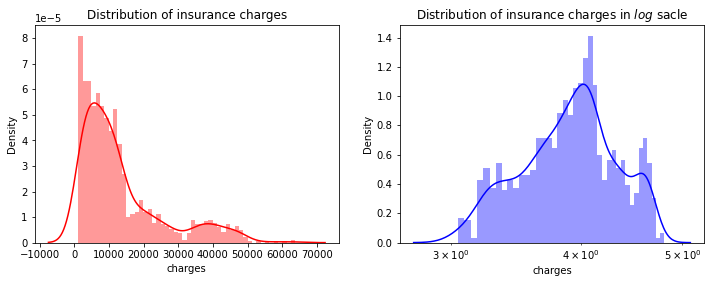

In [9]:
f= plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')
plt.show()


# Memvisualisasikan 1338 data pada bagian:
    
    -sex(jenis kelamin)
    -smoker(perokok)
    -region(daerah)

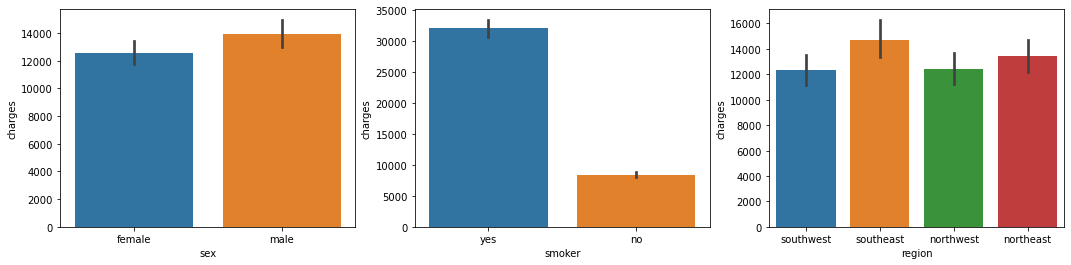

In [10]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.barplot(x='sex', y='charges', data=df)
plt.subplot(132)
sns.barplot(x='smoker', y='charges', data=df)
plt.subplot(133)
sns.barplot(x='region', y='charges', data=df)
plt.show()

# Memvisualisasikan data numerik menggunakan pairplot
- age
- bmi
- children
- charges

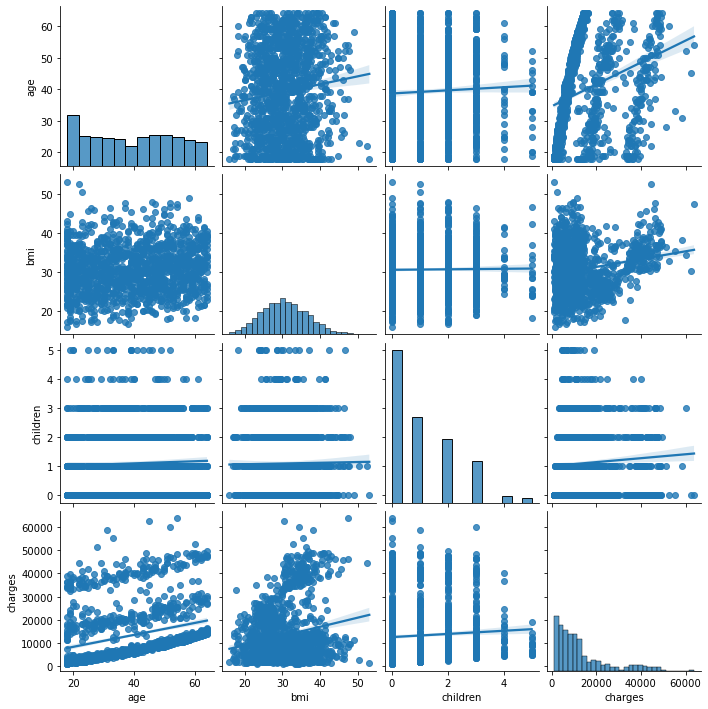

In [11]:
sns.pairplot(df,kind="reg")

<AxesSubplot:>

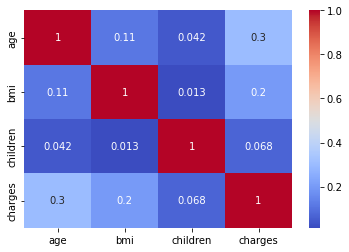

In [12]:
#Menemukan hubungan antar setiap data menggunakan pemetakan panas
#Plot a heatmap and look at the corelation
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)


**Label encoding** mengubah data label menjadi numerik sehingga bisa dioperasikan oleh program


In [13]:
# Kita ubah variabel menjadi 2 bagian yaitu 0 dan 1

df['sex']=df['sex'].map({'male':1, 'female':0})
df['smoker']=df['smoker'].map({'yes':1,'no':0})

In [14]:
# Menentukan variabel dummy untuk variabe yang tersedia -region

df = pd.get_dummies(df, columns=['region'], drop_first=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


# Part 3 DEVELOP
# **Train Test split**

# Menghilangkan kolom charges

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('charges',axis=1) # Variabel Independen
y = df['charges'] # dVariabel yang bergantung

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# Menentukan variabel lr sebagai LinearRegression dan memfit kan X_train dan y_train

In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

# Menghitung nilai Linear Regresion pada X_train dan X_test

In [17]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print(lr.score(X_test,y_test))

0.7958786376014414


**Now lets add Polynomial Feature and look at the result**

In [18]:
X = df.drop(['charges','region_northwest','region_southeast','region_southwest'], axis = 1)
Y = df.charges



quad = PolynomialFeatures (degree = 2)  #Polynomial Menghasilkan matriks fitur baru yang terdiri dari semua kombinasi polinomial
                                        #fitur dengan derajat kurang dari atau sama dengan derajat yang ditentukan.
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.884919734414724


# Mean Squared Error

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_test_pred)

18117605.544237092

# Mean Absolute Error

In [20]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, Y_test_pred)

2761.134814359846